In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [41]:
sales = pd.read_csv(
    '../data/sales_data.csv',
    parse_dates=['Date'])

In [42]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [43]:
sales.shape

(113036, 18)

In [44]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [45]:
# analyze the unit_cost column
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

<Axes: >

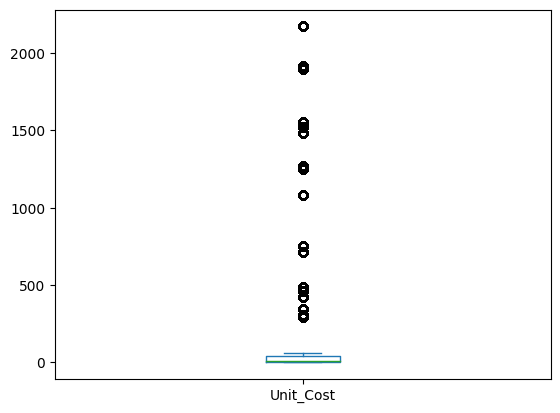

In [46]:
sales['Unit_Cost'].plot(kind='box', )

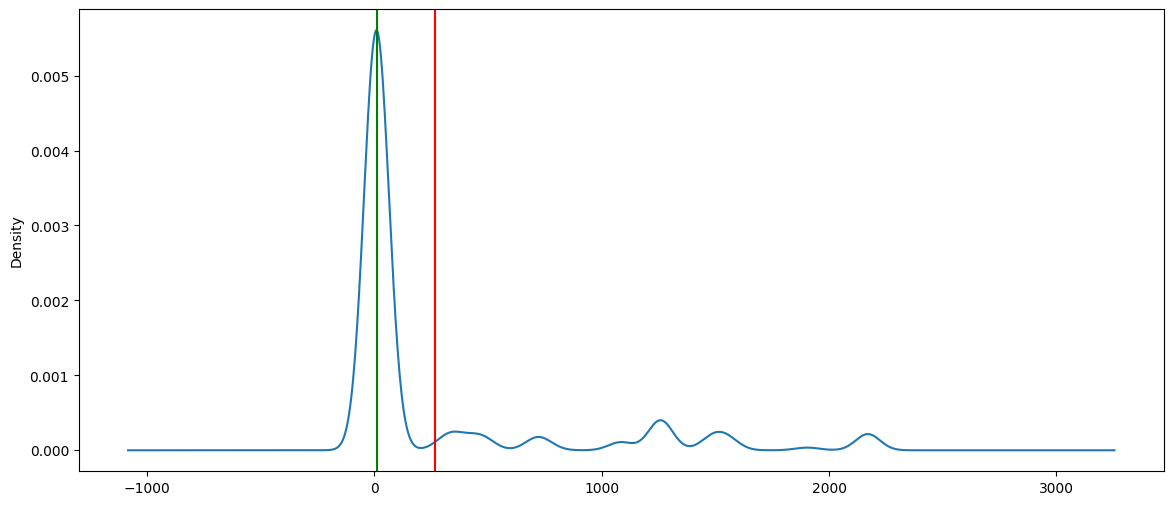

In [47]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(14,6))
ax.axvline(sales['Unit_Cost'].mean(), color= 'red')
ax.axvline(sales['Unit_Cost'].median(), color= 'green')                             

In [48]:
sales['Age_Group'].value_counts()

Age_Group
Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: count, dtype: int64

<Axes: ylabel='count'>

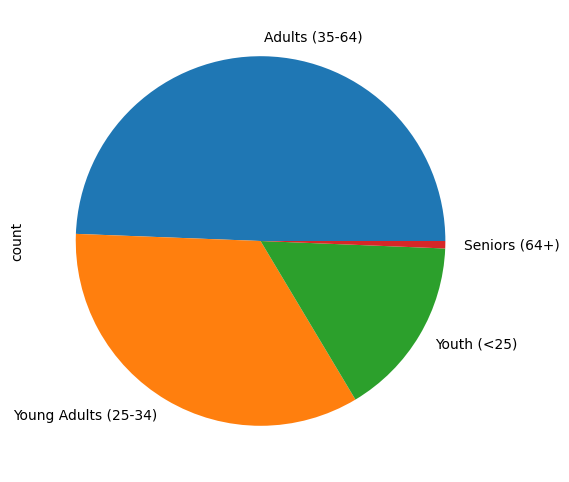

In [49]:
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0, 0.5, 'Number of sales')

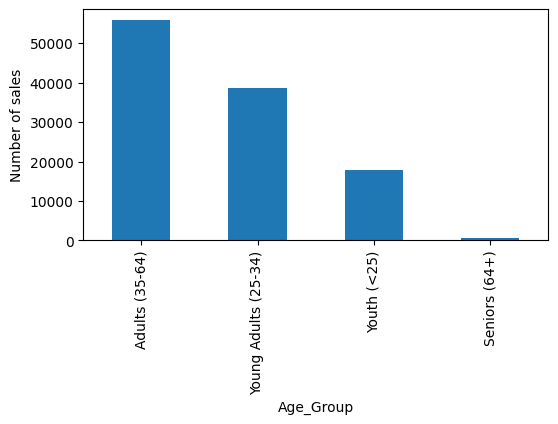

In [50]:
ax = sales['Age_Group'].value_counts().plot(kind='bar', figsize=(6,3))
ax.set_ylabel('Number of sales')

([<matplotlib.axis.YTick at 0x1e5a04b9650>,
 [Text(0, 0, 'Date'),
  Text(0, 1, 'Day'),
  Text(0, 2, 'Year'),
  Text(0, 3, 'Customer_Age'),
  Text(0, 4, 'Order_Quantity'),
  Text(0, 5, 'Unit_Cost'),
  Text(0, 6, 'Unit_Price'),
  Text(0, 7, 'Profit'),
  Text(0, 8, 'Cost'),
  Text(0, 9, 'Revenue')])

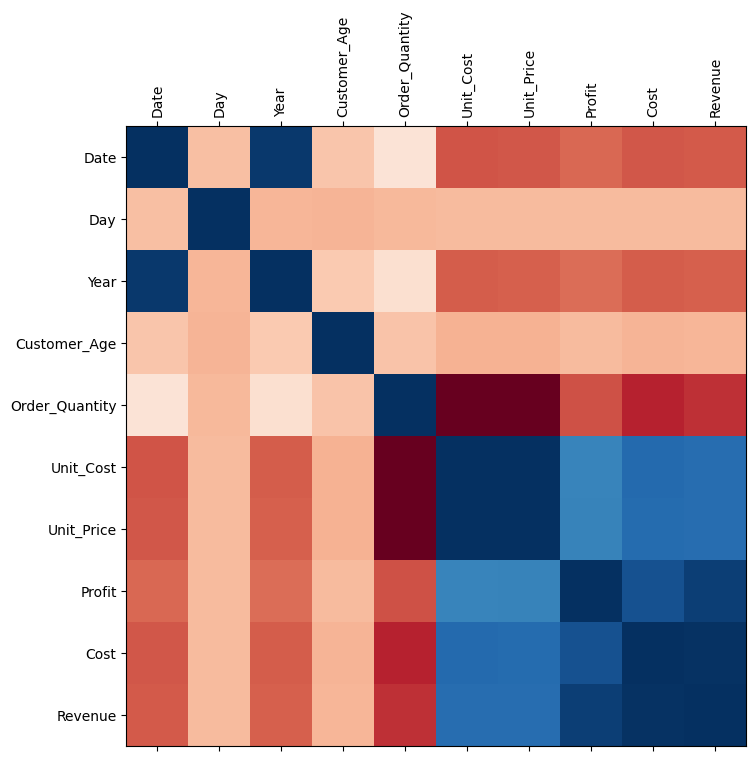

In [56]:
sales_num = sales.drop(['Month', 'State', 'Age_Group', 'Country',\
                        'Product_Category', 'Customer_Gender',\
                        'Sub_Category', 'Product'], axis=1)
corr = sales_num.corr()

fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);
